In [2]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

#Import COSMIC and other things
import cosmic
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.sample.sampler import independent


In [3]:
#Defining function for rv_variability
def rv_variable(m1, m2, a, period, ecc, sin_i):
    """
    Function to calculate readial velocity variability
    
    m1: Mass 1
    m2: Mass 2
    period: Period
    ecc: Eccentricity
    a: amplitude
    """
    var = (2*np.pi*a*m2*sin_i)/(period*(m1+m2)*(1-ecc**2)**(1/2))
    return var

In [4]:
def filter_func(m1 , m2, period , ecc, a):
    """
    Function that filters out unwanted values for each parameter 
    Such as 0,-1,inf,nan
    """
    p = period[period != 0]
    p = p[p != -1]
    p = p[p != np.inf]
    
    semi = a[a != 0]
    semi = semi[semi != -1]
    
    e = ecc[ecc != -1]
    
    #Start the filtering!
    #Can check the del_arr as it goes by uncommenting the print lines
    
    #period indecies
    x = period.index[period == 0]
    y = period.index[period == -1]
    z = period.index[period == np.inf]

    #Update del_arr
    del_arr = x
    del_arr = del_arr.append(y)
    del_arr = del_arr.append(z)
    #print(del_arr)

    #Semi major indecies
    x_2 = a.index[a == 0]
    y_2 = a.index[a == -1]

    #Update del_arr
    del_arr = del_arr.append(x_2)
    del_arr = del_arr.append(y_2)
    #print(del_arr)

    #Ecc indecies
    x_3 = ecc.index[ecc == -1]

    #Update del_arr
    del_arr = del_arr.append(x_3)
    #print(del_arr)
    
    #Create final array and remove duplicates
    delete_arr = np.unique(del_arr)

    ecc_f = []
    for i in range(len(ecc)):
        if ecc.index[i] not in delete_arr:
            ecc_f.append(ecc[ecc.index[i]])
    period_f = []
    for i in range(len(period)):
        if period.index[i] not in delete_arr:
            period_f.append(period[period.index[i]])
    a_f = []
    for i in range(len(a)):
        if a.index[i] not in delete_arr:
            a_f.append(a[a.index[i]])
    
    #Update the masses
    m1 = []
    for i in range(len(mass1)):
        if mass1.index[i] not in delete_arr:
            m1.append(mass1[mass1.index[i]])
    m2 = []
    for i in range(len(mass2)):
        if mass2.index[i] not in delete_arr:
            m2.append(mass2[mass2.index[i]])
            
    return m1, m2, period_f, ecc_f, a_f

In [5]:
#Set the runID, what change is being made, and size
param_change = 'primary_model'
size = 100
runID = 'salpeter55_run_1'

#Set Initial binary parameters

#Setting what evolution types are allowed
final_kstar1 = [10,11,12]
final_kstar2 = [10,11,12]

#Set the initial binary population parameters
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = \
     InitialBinaryTable.sampler('independent', final_kstar1, final_kstar2, binfrac_model=1.,
                                primary_model='salpeter55', ecc_model='sana12', porb_model='sana12',
                                qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=size)

#Can print initial binaries here to check
#print(InitialBinaries)

print('####################### Initial Binaries Set ##########################')

#Set the BSEDict
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'dtp' : 13700.0}

#Evolve the system
bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

print(bcm.iloc[:10])

print('###################### System Evolved ################################')

####################### Initial Binaries Set ##########################


/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1        lum_1     rad_1        teff_1  \
0      0.0      1.0  2.215632  2.215632    22.737531  1.771869   9511.293392   
0  13700.0     11.0  0.592964  0.646833     0.000004  0.012162   2338.369239   
1      0.0      1.0  6.612431  6.612431  1410.193267  3.264356  19664.842886   
1  13700.0     12.0  1.188231  1.189316     0.000004  0.005125   3652.121595   
2      0.0      0.0  0.701924  0.701924     0.117339  0.654220   4195.352717   
2  13700.0      0.0  0.701924  0.701924     0.148760  0.691820   4329.069985   
3      0.0      1.0  1.724597  1.724597     7.888189  1.575501   7741.134218   
3  13700.0     11.0  0.720960  0.720960     0.000007  0.011241   2835.315611   
4      0.0      1.0  0.918526  0.918526     0.414738  0.814550   5155.302037   
4  13700.0      1.0  0.918526  0.918526     0.927708  1.078359   5479.498268   

    massc_1    radc_1        menv_1  ...          porb          sep       ecc  \
0  0.000000  0.000000  1.000000e-10  .

In [7]:
#Get all parameters and create sini artificial data
mass1 = bcm.mass_1[bcm.tphys == 13700.0]
#print(mass1)
mass2 = bcm.mass_2[bcm.tphys == 13700.0]
#print(mass2)
period = bcm.porb[bcm.tphys == 13700.0]
#print(period)
ecc = bcm.ecc[bcm.tphys == 13700.0]
#print(ecc)
a = bcm.sep[bcm.tphys == 13700.0]
#print(a)

#Checking to make sure all initial dataframes are the 
#same length
#print(len(mass1))
#print(len(mass2))
#print(len(period))
#print(len(ecc))
#print(len(a))

m1, m2, period_f, ecc_f, a_f = filter_func(mass1, mass2, period, ecc, a)

sini = np.random.uniform(0, 1, len(m1))

print('######################### Filtering Complete #######################')

######################### Filtering Complete #######################


In [8]:
#Make the dataframes arrays in order to use rv funciton
m1 = np.array(m1)
m2 = np.array(m2)
ecc_f = np.array(ecc_f)
period_f = np.array(period_f)
a_f = np.array(a_f)
sini = np.array(sini)

rv = rv_variable(m1, m2, a_f, period_f, ecc_f, sini)

#Can check rv's below if wanted
#print(rv)
#print(len(rv))

print('##################### Start plotting #########################')

##################### Start plotting #########################


[27  7  6  9  3  2  0  2  1  2  5  0  1  0  0  1  0  0  0  0  0  0  0  0
  1]


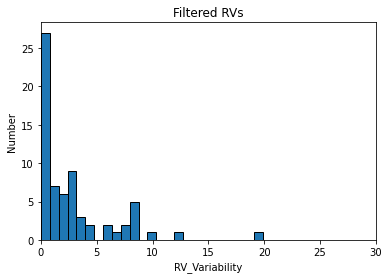

In [9]:
rv = pd.DataFrame(rv)

count, edges = np.histogram(rv, bins=25)

rv.plot(kind='hist', bins=25, edgecolor='black', alpha=1, legend=None)
plt.title('Filtered RVs')
plt.xlabel('RV_Variability')
plt.ylabel('Number')
plt.xlim(0,30)
#plt.savefig(path3 + 'Filtered_rv_' + runID + '.png')
#plt.show()

print(count)
#print(edges)

## Now that i know my filter_func works, lets try making the loop

In [10]:
#Set the runID, what change is being made, and size
param_change = 'primary_model'
size = 100
runID = 'salpeter55'

#Set Initial binary parameters

#Setting what evolution types are allowed
final_kstar1 = [10,11,12]
final_kstar2 = [10,11,12]

### Here is where I think I start the loop
counts = np.zeros((10,25))
edges = np.zeros((10,26))

for i in range(10):
    print("######################### Run ", i, " ###########################")
    #Set the initial binary population parameters
    InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = \
         InitialBinaryTable.sampler('independent', final_kstar1, final_kstar2, binfrac_model=1.,
                                    primary_model='salpeter55', ecc_model='sana12', porb_model='sana12',
                                    qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=size)

    #Can print initial binaries here to check
    #print(InitialBinaries)

    print('####################### Initial Binaries Set ##########################')

    #Set the BSEDict
    BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'dtp' : 13700.0}

    #Evolve the system
    bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

    print(bcm.iloc[:10])

    print('###################### System Evolved ################################')
    
    #Get all parameters and create sini artificial data
    mass1 = bcm.mass_1[bcm.tphys == 13700.0]
    #print(mass1)
    mass2 = bcm.mass_2[bcm.tphys == 13700.0]
    #print(mass2)
    period = bcm.porb[bcm.tphys == 13700.0]
    #print(period)
    ecc = bcm.ecc[bcm.tphys == 13700.0]
    #print(ecc)
    a = bcm.sep[bcm.tphys == 13700.0]
    #print(a)

    #Checking to make sure all initial dataframes are the 
    #same length
    #print(len(mass1))
    #print(len(mass2))
    #print(len(period))
    #print(len(ecc))
    #print(len(a))

    m1, m2, period_f, ecc_f, a_f = filter_func(mass1, mass2, period, ecc, a)

    sini = np.random.uniform(0, 1, len(m1))

    print('######################### Filtering Complete #######################')
    
    #Make the dataframes arrays in order to use rv funciton
    m1 = np.array(m1)
    m2 = np.array(m2)
    ecc_f = np.array(ecc_f)
    period_f = np.array(period_f)
    a_f = np.array(a_f)
    sini = np.array(sini)

    rv = rv_variable(m1, m2, a_f, period_f, ecc_f, sini)

    #Can check rv's below if wanted
    #print(rv)
    #print(len(rv))

    print('##################### Get histogram counts #########################')
    
    rv = pd.DataFrame(rv)

    count, edge = np.histogram(rv, bins=25)
    
    counts[i] = count
    edges[i] = edge

######################### Run  0  ###########################
####################### Initial Binaries Set ##########################


/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1      lum_1     rad_1        teff_1  \
0      0.0      1.0  3.047258  3.047258  81.273098  2.101718  12007.956881   
0  13700.0     11.0  1.122289  1.122289   0.000004  0.006645   3274.076166   
1      0.0      1.0  1.640156  1.640156   6.333479  1.539606   7412.682405   
1  13700.0     11.0  0.533071  0.533071   0.000010  0.013723   2800.314408   
2      0.0      1.0  0.917958  0.917958   0.413484  0.814125   5152.746445   
2  13700.0      1.0  0.917958  0.917958   0.922365  1.075914   5477.804637   
3      0.0      1.0  0.844310  0.844310   0.275342  0.762424   4809.936112   
3  13700.0      1.0  0.844310  0.844310   0.467476  0.874150   5127.628756   
4      0.0      1.0  1.895238  1.895238  11.833526  1.643381   8388.398601   
4  13700.0     11.0  0.684881  0.684881   0.000005  0.011682   2567.309277   

    massc_1    radc_1        menv_1  ...           porb           sep  \
0  0.000000  0.000000  1.000000e-10  ...       1.893329     11.74799

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1    mass0_1     mass_1         lum_1     rad_1  \
0      0.0      1.0   0.776427   0.776427  1.849081e-01  0.714740   
0  13700.0      1.0   0.776427   0.776427  2.657559e-01  0.774876   
1      0.0      1.0  13.392926  13.392926  1.418160e+04  4.965001   
1  13700.0     13.0  12.875562   1.384541  1.328264e-10  0.000014   
2      0.0      1.0   1.369153   1.369153  2.809793e+00  1.355278   
2  13700.0     15.0   0.304927   0.000000  2.714778e-03  0.018035   
3      0.0      1.0   0.996253   0.996253  6.171772e-01  0.879683   
3  13700.0      3.0   0.995707   1.561518  1.854066e+01  7.642996   
4      0.0      1.0   3.600767   3.600767  1.543386e+02  2.306667   
4  13700.0     15.0   0.753643   0.000000  4.542429e-05  0.010851   

         teff_1   massc_1    radc_1        menv_1  ...          porb  \
0   4497.119424  0.000000  0.000000  5.849023e-02  ...      7.430751   
0   4729.053937  0.000000  0.000000  5.851216e-02  ...      7.287415   
1  28394.961920  0.00000

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1        lum_1     rad_1        teff_1  \
0      0.0      1.0  3.088214  3.088214    85.601925  2.117307  12119.886790   
0  13700.0     11.0  1.044774  1.044774     0.000004  0.007550   3055.443543   
1      0.0      1.0  0.837110  0.837110     0.264217  0.757520   4775.984817   
1  13700.0      1.0  0.837110  0.837110     0.439433  0.861193   5086.775640   
2      0.0      1.0  0.848369  0.848369     0.281787  0.765187   4829.098953   
2  13700.0      1.0  0.848369  0.848369     0.484188  0.881769   5150.454507   
3      0.0      1.0  9.420246  9.420246  4670.712036  4.018799  23909.319594   
3  13700.0     11.0  1.087363  1.087363     0.000004  0.007058   3032.204716   
4      0.0      1.0  0.923023  0.923023     0.424761  0.817930   5175.444474   
4  13700.0      1.0  0.923023  0.923023     0.971539  1.098584   5491.842477   

    massc_1    radc_1        menv_1  ...        porb         sep       ecc  \
0  0.000000  0.000000  1.000000e-10  ... 

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1      lum_1     rad_1        teff_1  \
0      0.0      1.0  2.854738  2.854738  62.964843  2.027501  11470.003821   
0  13700.0     11.0  0.867362  0.867362   0.000004  0.009545   2676.566408   
1      0.0      1.0  2.222473  2.222473  23.027676  1.774643   9534.032445   
1  13700.0     11.0  0.544098  0.544098   0.000003  0.013562   2117.802406   
2      0.0      1.0  2.722791  2.722791  52.237958  1.975761  11089.167505   
2  13700.0     11.0  0.827895  0.827895   0.000004  0.009992   2652.338510   
3      0.0      1.0  1.197278  1.197278   1.499988  1.129765   6036.670990   
3  13700.0     11.0  0.572723  0.572723   0.000043  0.013153   4097.889313   
4      0.0      1.0  1.368728  1.368728   2.805787  1.354827   6446.756979   
4  13700.0     11.0  0.652174  0.652174   0.000003  0.012094   2235.214572   

    massc_1    radc_1        menv_1  ...        porb         sep       ecc  \
0  0.000000  0.000000  1.000000e-10  ...    4.187760   17.87789

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1    mass0_1     mass_1         lum_1     rad_1  \
0      0.0      1.0   5.275801   5.275801  6.335836e+02  2.865236   
0  13700.0     11.0   1.007831   1.012949  3.597469e-06  0.007912   
1      0.0      1.0   2.176785   2.176785  2.113895e+01  1.756130   
1  13700.0     15.0   0.544865   0.000000  2.104126e-03  0.013550   
2      0.0      1.0   1.242601   1.242601  1.788368e+00  1.195019   
2  13700.0     11.0   0.512958   0.512958  3.324208e-05  0.014026   
3      0.0      1.0  15.019362  15.019362  1.996048e+04  5.324833   
3  13700.0     13.0  14.392052   1.586566  1.454632e-10  0.000014   
4      0.0      0.0   0.730171   0.730171  1.396094e-01  0.678472   
4  13700.0      0.0   0.730171   0.730171  1.845232e-01  0.723057   

         teff_1   massc_1    radc_1        menv_1  ...           porb  \
0  17184.637651  0.000000  0.000000  1.000000e-10  ...   36993.956779   
0   2838.735901  1.012949  0.007912  1.000000e-10  ...  590103.074034   
1   9381.279843  0.00

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1       lum_1     rad_1        teff_1  \
0      0.0      1.0  2.114757  2.114757   18.754137  1.731056   9170.400219   
0  13700.0     11.0  0.556600  0.556600    0.000004  0.013381   2193.925458   
1      0.0      1.0  1.701421  1.701421    7.436994  1.565956   7651.193053   
1  13700.0     11.0  0.643539  0.643539    0.000003  0.012204   2235.567998   
2      0.0      1.0  5.545526  5.545526  757.709780  2.948516  17715.099261   
2  13700.0     12.0  1.368340  1.368340    0.000005  0.001223   7823.598141   
3      0.0      1.0  0.877766  0.877766    0.332367  0.785325   4967.631954   
3  13700.0      1.0  0.877766  0.877766    0.628397  0.945702   5308.244878   
4      0.0      1.0  1.290207  1.290207    2.133376  1.260636   6240.819239   
4  13700.0     11.0  0.535303  0.535303    0.000032  0.013690   3716.804783   

    massc_1    radc_1        menv_1  ...           porb           sep  \
0  0.000000  0.000000  1.000000e-10  ...      79.844971  

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1      lum_1     rad_1       teff_1  \
0      0.0      0.0  0.623392  0.623392   0.072528  0.579573  3952.233038   
0  13700.0      0.0  0.623392  0.623392   0.082489  0.602005  4004.691850   
1      0.0      0.0  0.737341  0.737341   0.145878  0.684368  4331.338078   
1  13700.0      0.0  0.737341  0.737341   0.195069  0.730974  4506.770585   
2      0.0      1.0  2.151621  2.151621  20.147051  1.745948  9296.228725   
2  13700.0     11.0  0.589485  0.589842   0.000004  0.012917  2246.877557   
3      0.0      1.0  1.396662  1.396662   3.078538  1.383100  6530.235949   
3  13700.0     10.0  0.299382  0.299382   0.000051  0.018178  3638.678716   
4      0.0      1.0  0.813450  0.813450   0.230330  0.741256  4665.227199   
4  13700.0      1.0  0.813450  0.813450   0.359872  0.822744  4950.786053   

    massc_1    radc_1        menv_1  ...           porb           sep  \
0  0.000000  0.000000  8.918735e-02  ...       8.016022     17.824253   
0  0.0

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1      lum_1     rad_1        teff_1  \
0      0.0      1.0  2.452237  2.452237  34.376568  1.867702  10272.626712   
0  13700.0     11.0  0.957513  0.957513   0.000005  0.008535   2941.974717   
1      0.0      1.0  2.512846  2.512846  37.927758  1.892106  10460.108576   
1  13700.0     11.0  0.650875  0.650875   0.000003  0.012110   2243.571578   
2      0.0      1.0  1.048891  1.048891   0.793401  0.933903   5662.287944   
2  13700.0     10.0  0.406820  0.406820   0.000544  0.015818   7039.340670   
3      0.0      1.0  2.613735  2.613735  44.401986  1.932494  10766.168054   
3  13700.0     11.0  0.349495  0.349495   0.000072  0.016983   4103.191415   
4      0.0      0.0  0.625725  0.625725   0.073556  0.581893   3958.239769   
4  13700.0      0.0  0.625725  0.625725   0.083868  0.604745   4012.197615   

    massc_1    radc_1        menv_1  ...         porb         sep       ecc  \
0  0.000000  0.000000  1.000000e-10  ...     2.080628   11.493

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1        lum_1     rad_1        teff_1  \
0      0.0      1.0  1.831706  1.831706    10.230695  1.618296   8151.113981   
0  13700.0     11.0  0.566003  0.566003     0.000005  0.013248   2359.927323   
1      0.0      1.0  0.756032  0.756032     0.163481  0.699251   4408.798346   
1  13700.0      1.0  0.756032  0.756032     0.225856  0.751728   4609.959193   
2      0.0      1.0  1.772447  1.772447     8.881117  1.594794   7925.637137   
2  13700.0     10.0  0.400680  0.400680     0.000018  0.015935   2986.623755   
3      0.0      1.0  1.586605  1.586605     5.469630  1.514344   7205.212940   
3  13700.0     11.0  0.681544  0.681544     0.000010  0.011723   3014.053253   
4      0.0      1.0  9.759380  9.759380  5242.598517  4.104214  24352.370259   
4  13700.0     15.0  1.150514  0.000000     0.064028  0.005670  38732.720349   

    massc_1    radc_1        menv_1  ...         porb         sep       ecc  \
0  0.000000  0.000000  1.000000e-10  ...

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1        lum_1      rad_1        teff_1  \
0      0.0      1.0  1.365134  1.365134     2.772019   1.350984   6436.408138   
0  13700.0     10.0  0.415310  0.415310     0.000090   0.015660   4514.951784   
1      0.0      1.0  1.344536  1.344536     2.584172   1.328054   6378.846291   
1  13700.0     11.0  0.583568  0.583568     0.000008   0.013003   2683.287661   
2      0.0      1.0  6.191301  6.191301  1119.969437   3.142082  18921.798629   
2  13700.0     11.0  1.134123  1.139137     0.000004   0.006442   3226.560174   
3      0.0      1.0  1.354697  1.354697     2.675638   1.339557   6406.869815   
3  13700.0     15.0  1.354298  0.000000    94.365533  21.684714   3880.575311   
4      0.0      1.0  0.771448  0.771448     0.179454   0.711026   4475.226921   
4  13700.0      1.0  0.771448  0.771448     0.255338   0.769149   4699.411951   

    massc_1    radc_1        menv_1  ...           porb           sep  \
0  0.000000  0.000000  1.000000e-10

In [11]:
print(counts)
print(edges)

[[16.  8.  3.  2.  2.  5.  3.  0.  2.  0.  0.  2.  1.  0.  0.  0.  1.  0.
   0.  2.  1.  1.  0.  0.  1.]
 [33.  4.  7.  4.  3.  3.  4.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  1.]
 [21.  6.  7.  4.  0.  4.  3.  1.  1.  0.  2.  3.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  1.]
 [29. 10.  5.  2.  1.  4.  2.  1.  1.  0.  4.  0.  2.  2.  0.  1.  0.  1.
   1.  0.  0.  0.  0.  0.  1.]
 [22.  5.  3.  1.  6.  4.  3.  1.  1.  0.  3.  1.  1.  1.  1.  0.  1.  1.
   0.  0.  0.  0.  1.  0.  1.]
 [16.  7.  6.  2.  2.  2.  1.  1.  2.  2.  1.  0.  1.  0.  1.  1.  0.  0.
   0.  0.  0.  0.  1.  0.  1.]
 [35. 10.  7.  1.  1.  0.  1.  4.  1.  2.  1.  2.  0.  0.  0.  0.  1.  1.
   1.  0.  0.  0.  1.  0.  1.]
 [30.  5.  5.  1.  0.  3.  1.  2.  0.  1.  1.  2.  2.  0.  0.  0.  0.  1.
   0.  0.  1.  0.  0.  0.  1.]
 [16.  5.  7.  3.  3.  2.  2.  1.  3.  3.  1.  1.  1.  2.  0.  0.  0.  0.
   0.  0.  1.  0.  0.  0.  1.]
 [27.  4.  6.  1.  0.  3.  1.  0.  0.  1.  0.  1.  1.  

Text(0.5, 1.0, 'RV_Variability salpeter55')

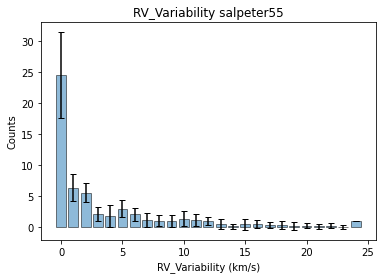

In [23]:
avg_counts = np.mean(counts, axis=0)
avg_edges = np.mean(edges, axis=0)
counts_std = np.std(counts, axis=0)
x_pos = np.arange(len(avg_counts))

plt.bar(x_pos, avg_counts, yerr=counts_std, align='center', alpha=0.5, ec='black', capsize=3)
plt.xlabel('RV_Variability (km/s)')
plt.ylabel('Counts')
plt.title('RV_Variability ' + runID)